In [2]:
import zipfile

from PIL import Image
from PIL import ImageOps
import pytesseract  
import cv2 as cv
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [3]:
face_cascade_name = cv.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv.CascadeClassifier()
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print("Error loading xml file")
    exit(0)

In [6]:
### Contact sheet, base image to paste on

contact_sheet = Image.new("RGB", (500,200))


### Functions 


def open_zip(file_name):
    # Take a zip file and return a list of PIL.Image files
    # PARAM: ZIP.file
    # RETURN: list of PIL.Image files
    
    myzip =  zipfile.ZipFile(file_name, mode = 'r')
    files_lst = [myzip.open(file) for file in myzip.namelist()]

    pic_lst = [Image.open(pic) for pic in files_lst] 
    
    return pic_lst
    
    
    
def mod_gray(pic):
    ##Convert the picture to array, convert it to gray and return that array
    #PARAM: PIL.Image file
    #RETURN: ndarray

    img = np.array(pic)
    convert = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return convert



def create_sheet(image, boxes):
    # take image and list of bounding boxes for create contact sheet of the detected faces
    # PARAM: image - PIL.Image
    #        boxes - list of bounding boxes with (x,y,w,h) format
    # RETERUN: display the sheet
    
    # create copy of the empty sheet for the image
    temp_sheet = contact_sheet.copy()
    
    #starting point to paste the image
    img_x = 0
    img_y = 0
    
    # loop trough the boxes, crop the box and paste in temp sheet
    
        
    for box in boxes:
        x,y,z,i = box
        face = image.crop((x,y,x+z,y+i))
        face.thumbnail((100,100))
        temp_sheet.paste(face, (img_x, img_y))
        if img_x < 400:
            img_x += 100
        else:
            img_x = 0
            img_y += 100
    
    display(temp_sheet)



    
    
def create_dict(images, boxes, text):
    # Takes images data and store in dictionary
    # PARAM: images - List of images PIL.Image
    #        boxes - List of arrays for faces
    #        text - List of image txt
    
    images_data = {}
    
    i = 0              # accum for box and text index
    for pic in images:
        images_data['a-{}.png'.format(i)] = {'image': images[i],'bounding_box': boxes[i], 'text': text[i]}
        i += 1
        
    return images_data
    






def extract_faces(file, name):
    # take file and the name to search for in the text, return contact sheet with all faces in the image 
    # if the given name in the image text
    # PARAM: file - ZIP file
    #        name - str, name to search in text
    # RETURN: PIL.Image file 
    
    # Create list of arrays from the given images in file
    mod_gray_lst = [mod_gray(pic) for pic in open_zip(file)]


    # Create list of arrays with bounding boxes for detected faces
    faces_box = []

    for img in mod_gray_lst:
        faces_box.append(face_cascade.detectMultiScale(img, 1.35))
    
    
    
    # create list of txt for each image
    text_str = []

    for img in mod_gray_lst:
        text = pytesseract.image_to_string(Image.fromarray(img), lang = 'eng')
        text_str.append(text)
    
    # create dictionary from images in file, bounding box and text of image
    data_dict = create_dict(open_zip(file), faces_box, text_str)
    
    
    # loop dictionary and crate the sheet if text found in image
    for key_img in data_dict:
        if name in data_dict[key_img]['text']:
            print('Found name in {}'.format(key_img))
            if data_dict[key_img]['bounding_box'] == ():
                print('but no faces found!')
            else:
                create_sheet(data_dict[key_img]['image'],data_dict[key_img]['bounding_box'].tolist() )
        else:
            print('No names in {}'.format(key_img))
    

Found name in a-0.png


C:\Users\ronab\AppData\Local\Temp/ipykernel_23576/1534843532.py:122: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data_dict[key_img]['bounding_box'] == ():


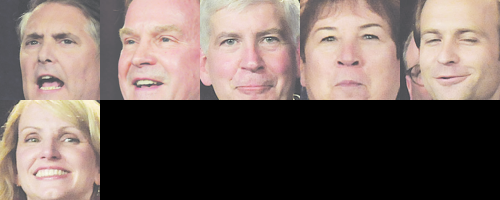

Found name in a-1.png


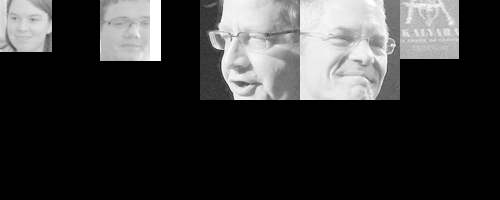

Found name in a-2.png
but no faces found!
No names in a-3.png
No names in a-4.png
Found name in a-5.png


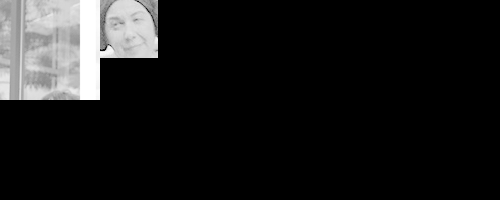

Found name in a-6.png


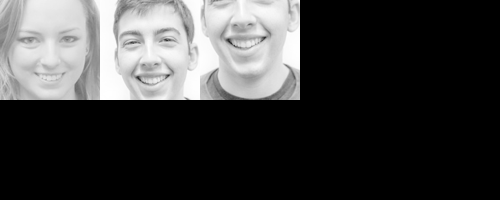

Found name in a-7.png


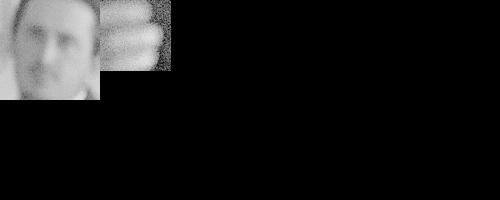

No names in a-8.png
No names in a-9.png
No names in a-10.png
No names in a-11.png
Found name in a-12.png


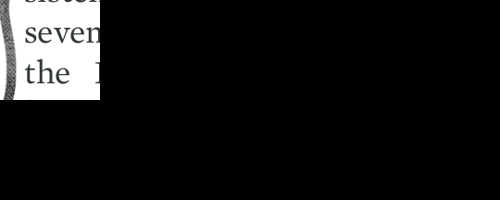

No names in a-13.png


In [8]:
extract_faces('images.zip', 'Mark')